In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [ ]:
#create new directory for silhouettes (thresholded images)

In [ ]:
# Makes a directory for our silhouettes if there isn't one already.
if 'silhouettes' not in os.listdir():
    os.mkdir('silhouettes')

In [ ]:
# Removing mega evolution pokemon and gender specific labels like 'm' or 'f'
for root,dirs,files in os.walk('./pokemon/pokemon'):
    for file in files:
        f = os.path.join(root,file)
        if 'mega'in f or '-' in f or 'f' in f:
            os.remove(f)

In [ ]:
# Storing image paths to be read by cv function
files = []
for file in os.listdir('./pokemon/pokemon'):
    number = int(file.split('.')[0])
    files.append(number)
files.sort(key=int)
images = []
for file in files:
    file = 'pokemon/pokemon/' + str(file) + '.png'
    images.append(file)

In [ ]:
path = 'silhouettes/'
for i,image in enumerate(images):
    # Read each image in grayscale
    img = cv2.imread(image,0)
    # Extract the external contours of the image
    contours,hierarchy = cv2.findContours(img,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
    # Create a new image to draw the contours on
    external_contours = np.zeros(img.shape)
    for j in range(len(contours)):
        #External contours
        cv2.drawContours(external_contours,contours,j,255,-1)
       
    # Save the silhouette to disk.
    #cv2.imwrite(os.path.join(path,str(i) + ".png"),external_contours)


In [ ]:
plt.imshow(cv2.imread(images[0],0),cmap='gray')

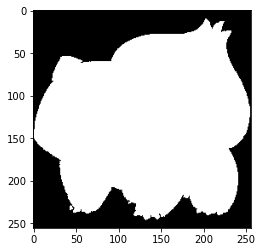

In [9]:
plt.imshow(cv2.imread('./silhouettes/0.png',0),cmap='gray')